In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans , DBSCAN
from sklearn.preprocessing import StandardScaler



import edilmesi gereken kütüphaneler 

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
dataset=pd.concat([X, y], axis=1)


veri setini adresten çektik . future ve targetsleri birleştirip bir tane datafram oluşturduk

In [16]:
print(dataset.columns)
print(dataset.info())
print(dataset.describe())


Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non

dataset hakkında bilgileri , column adlarını ve describesini aldık

In [17]:
print(dataset.isnull().sum())

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64


null değerler var mı onun kontrolülünü yaptım

In [18]:
dataset=dataset.drop(columns=["Diagnosis"])
print(dataset.head())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60 

kümelemeye engel olan sınıflar çıkardım ve datasetin head kısmını yazdırdım 

In [19]:
string_cols = dataset.select_dtypes(include=['object']).columns
print(string_cols)


Index([], dtype='object')


datasetde başka string ifade var mı onun kontrolü yapıdım

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# veri ölçeklendirmesi yaptık

veriler ölçeklendirildi yani bir birine benzetildi değerleri yakınlaştırıldı bu sayede model eğitimi daha kolay olur

<Figure size 2800x2600 with 0 Axes>

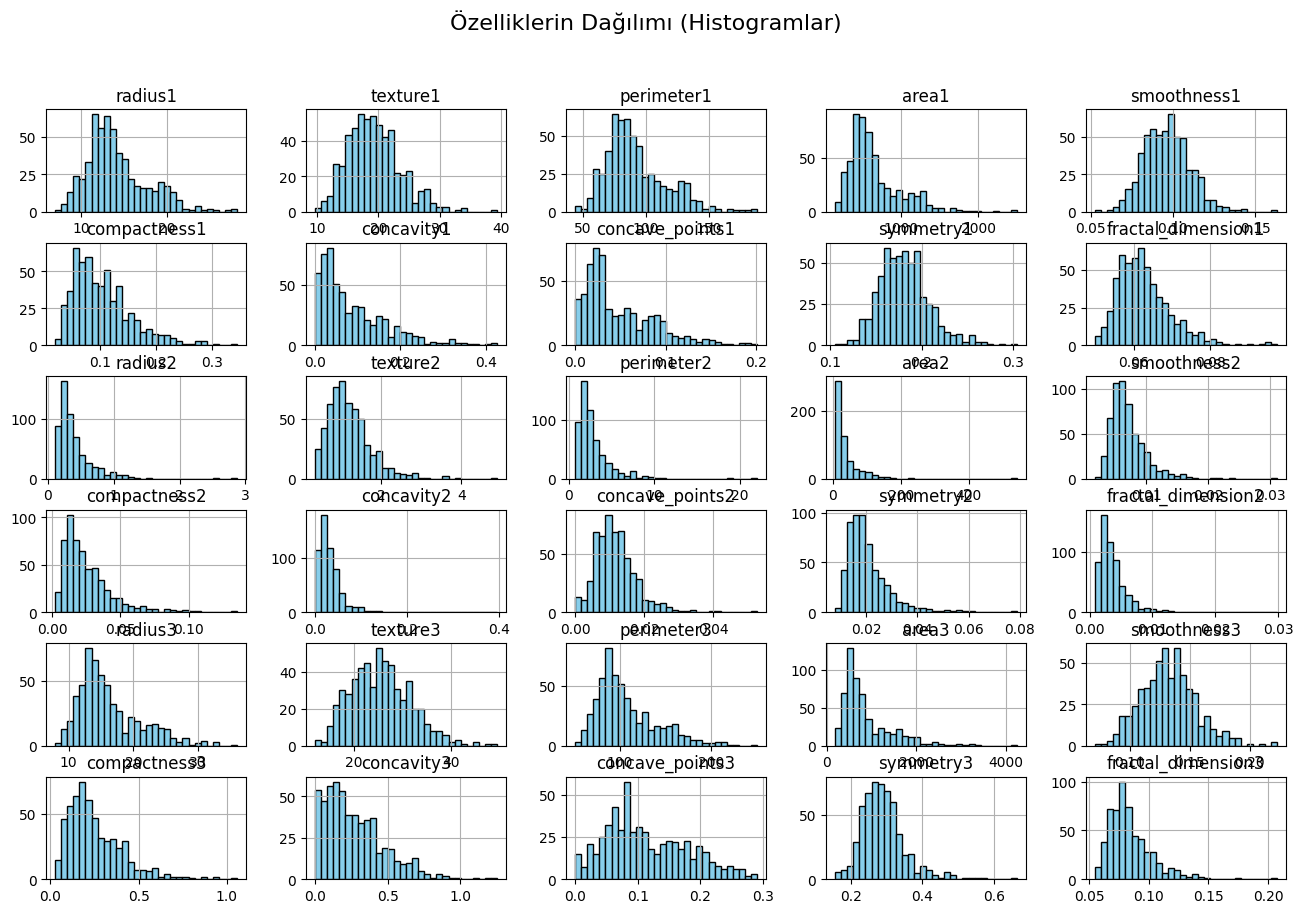

In [43]:
scaled_df = pd.DataFrame(X, columns=X.columns)
# Tüm özelliklerin dağılımını çiz
plt.figure(figsize=(28, 26))
scaled_df.hist(bins=30, figsize=(16,10), color='skyblue',edgecolor='black')
plt.suptitle("Özelliklerin Dağılımı (Histogramlar)", fontsize=16)
plt.show()


dataset deki özelliklerin dağılımını göterir

In [21]:
k=range(1,11)
inertia=[]
for i in k:
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

optimum k değerini bulmaya yarar

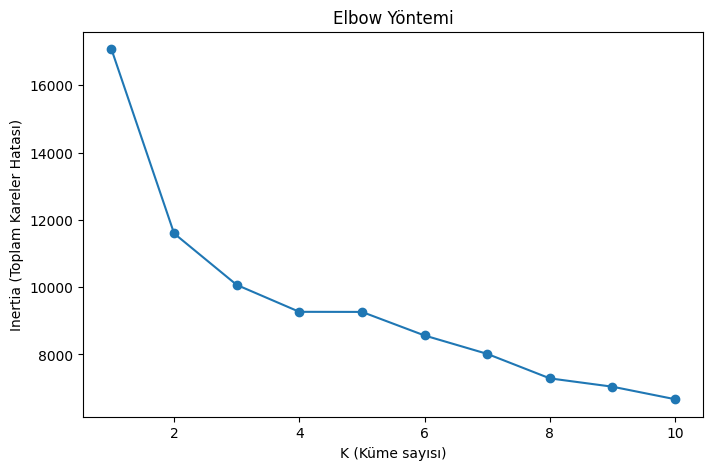

In [22]:
plt.figure(figsize=(8,5))
plt.plot(k, inertia, marker='o')
plt.xlabel('K (Küme sayısı)')
plt.ylabel('Inertia (Toplam Kareler Hatası)')
plt.title('Elbow Yöntemi')
plt.show()

bulunan k değerlerinin grafiğini çizdik bu grafikde sert ani değişim optimum k değeridir ve 1 yakın olması daha iyi

In [23]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Skoru (K=2): {score:.3f}")

Silhouette Skoru (K=2): 0.345


k=2 alarak model eğititim ve silhouette skorunu yazdırdım

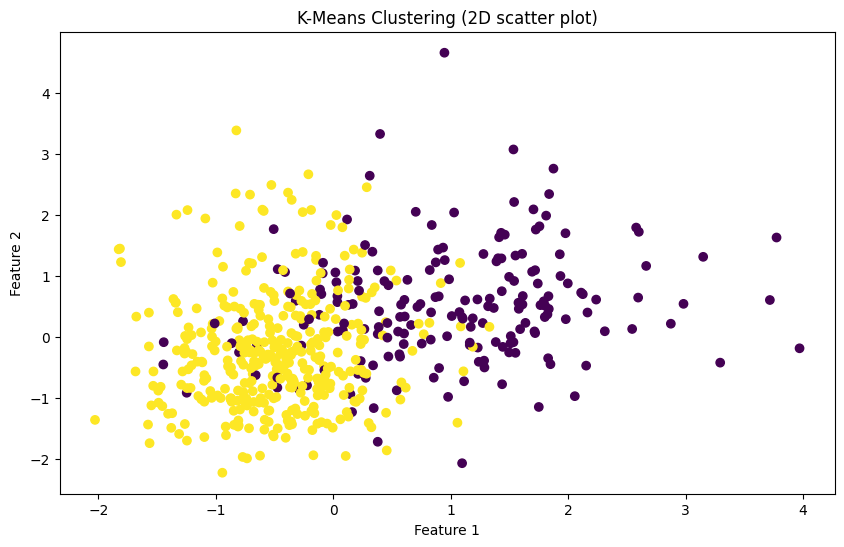

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.title('K-Means Clustering (2D scatter plot)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


her veri setini renklerine göre kümeleme yapar n_clusters =2 yaptığımız için 2 renk olarak kümelem yaptı

In [25]:
#DBSCAN algorithm
dbscan=DBSCAN(eps=1.8, min_samples=5)
predict=dbscan.fit_predict(X_scaled)

eps=1.8 , komşuluk yarıçapı yani bir veri diğer veri arasındaki uzaklık bu kadarsa komşu olurlar
min_samples=5 en az bir küme olabilmek için 5 tane veri olması gerekiyor 
ve burda modeli eğittik

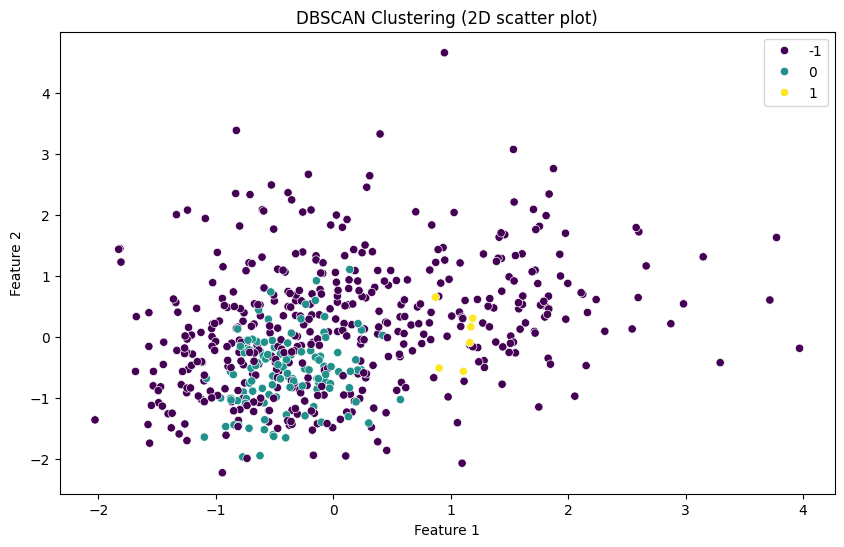

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=predict, palette='viridis')
plt.title('DBSCAN Clustering (2D scatter plot)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

veriyi nasıl kümelere ayırdığını gösterir
-1 değerler verideki gürültü yapan değerlerdir